In [70]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
import requests
import gmaps

In [31]:
# Specifying path
path = "flights.csv"

#creating dataframe from excel file
df = pd.read_csv(path, low_memory=False)

# display dataframe
df.head()



,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Calculate the average number of delays per airport.
avg_delays = df.groupby('AIRLINE')['ARRIVAL_DELAY'].sum().mean()

# Display average number of delays per airport.
print('Average Number of Delays per Airline: ' + str(avg_delays))

Average Number of Delays per Airline: 1798711.5


In [27]:
# display dataframe
df


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
print ("Number of different Airlines:",df['AIRLINE'].nunique() )
print ("Airline Count",df['AIRLINE'].value_counts(), sep='\n')

Number of different Airlines: 14
Airline Count
WN    1261855
DL     875881
AA     725984
OO     588353
EV     571977
UA     515723
MQ     294632
B6     267048
US     198715
AS     172521
NK     117379
F9      90836
HA      76272
VX      61903
Name: AIRLINE, dtype: int64


In [29]:
# data.mean() and data.median()
print('Average Departure delay is ',df['DEPARTURE_DELAY'].mean(), 'and Median Departure delay is',df['DEPARTURE_DELAY'].median())
print('Average Arrival delay is ',df['ARRIVAL_DELAY'].mean(), 'and Median Arrival delay is',df['ARRIVAL_DELAY'].median())

Average Departure delay is  9.370158275198389 and Median Departure delay is -2.0
Average Arrival delay is  4.407057357987598 and Median Arrival delay is -5.0


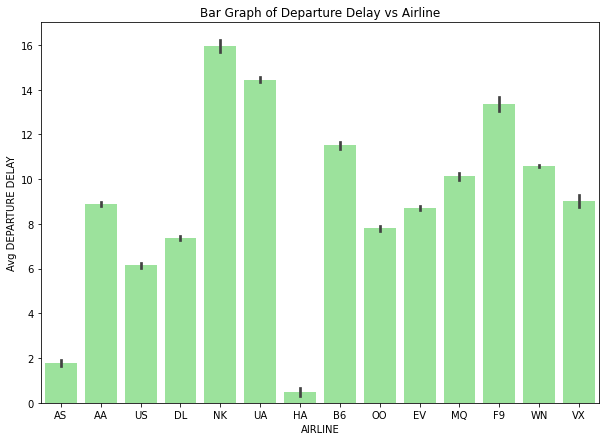

In [33]:
# Departure Delay vs Airline
fig = plt.figure(1, figsize=(10,7))
ax1 = sns.barplot(x="AIRLINE", y="DEPARTURE_DELAY", data=df , color="lightgreen")
plt.xlabel("AIRLINE")
plt.ylabel("Avg DEPARTURE DELAY")
plt.title("Bar Graph of Departure Delay vs Airline")
plt.show()

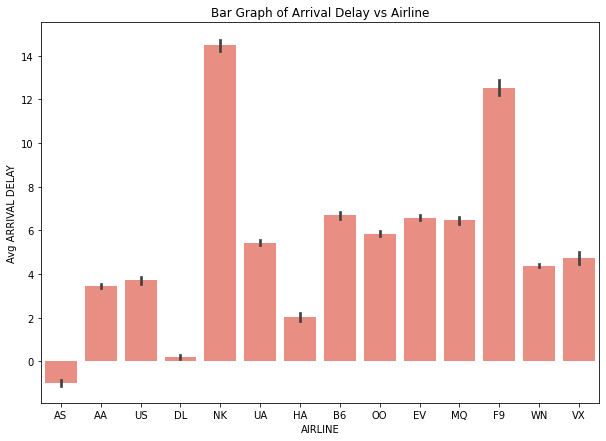

In [36]:
# Arrival Delay vs Airline
fig = plt.figure(1, figsize=(10,7))
ax2 = sns.barplot(x="AIRLINE", y="ARRIVAL_DELAY", data=df, color="salmon" )
plt.xlabel("AIRLINE")
plt.ylabel("Avg ARRIVAL DELAY")
plt.title("Bar Graph of Arrival Delay vs Airline")
plt.show()


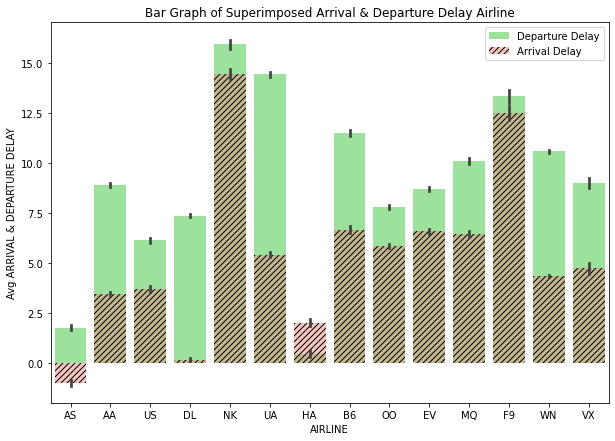

In [39]:
# superimposing both graphs to see difference
fig = plt.figure(1, figsize=(10,7))
labels = ['green','hatch']
ax3 = sns.barplot(y="DEPARTURE_DELAY", x="AIRLINE", data=df, color="lightgreen", label = 'Departure Delay')
ax3 = sns.barplot(y="ARRIVAL_DELAY", x="AIRLINE", data=df, color="salmon", hatch = '////',alpha = 0.5, label = 'Arrival Delay')


plt.xlabel("AIRLINE")
plt.ylabel("Avg ARRIVAL & DEPARTURE DELAY")
plt.title("Bar Graph of Superimposed Arrival & Departure Delay Airline")
plt.legend()
plt.show()

In [40]:
# Observation: It is observed through superimposed graph that departure delays are higher than arrival delays. One can assume that airlines probably increase speed to minimize delays.

In [41]:
# describe to print 5 number summary
# descending order of median = 50%
Dep_Delay = df.groupby('AIRLINE')['DEPARTURE_DELAY'].describe()[['max', '75%','50%','25%', 'min']]
print("Departure Delay",Dep_Delay.sort_values(by='50%',ascending=False), sep='\n')

Arvl_Delay = df.groupby('AIRLINE')['ARRIVAL_DELAY'].describe()[['max', '75%','50%','25%', 'min']]
print("Arrival Delay",Arvl_Delay.sort_values(by='50%',ascending=False), sep='\n')

Departure Delay
            max   75%  50%  25%   min
AIRLINE                              
UA       1314.0  13.0  1.0 -4.0 -40.0
WN        665.0  11.0  0.0 -3.0 -28.0
DL       1289.0   4.0 -1.0 -4.0 -61.0
NK        836.0  18.0 -1.0 -5.0 -37.0
VX        644.0   7.0 -1.0 -4.0 -24.0
AA       1988.0   5.0 -2.0 -5.0 -68.0
B6       1006.0  11.0 -2.0 -5.0 -31.0
F9       1112.0  12.0 -2.0 -7.0 -46.0
MQ       1544.0   8.0 -2.0 -6.0 -36.0
US        759.0   4.0 -2.0 -5.0 -35.0
EV       1274.0   4.0 -3.0 -6.0 -55.0
OO       1378.0   4.0 -3.0 -6.0 -56.0
AS        963.0   1.0 -4.0 -8.0 -82.0
HA       1433.0   1.0 -4.0 -7.0 -27.0
Arrival Delay
            max   75%  50%   25%   min
AIRLINE                               
NK        833.0  20.0  0.0 -10.0 -60.0
F9       1101.0  16.0 -1.0 -11.0 -73.0
HA       1467.0   5.0 -2.0  -6.0 -67.0
VX        651.0   9.0 -3.0 -12.0 -81.0
EV       1223.0   9.0 -4.0 -12.0 -64.0
OO       1372.0   8.0 -4.0 -12.0 -69.0
US        750.0   9.0 -4.0 -12.0 -87.0
WN        6

In [42]:
Distance_corr = df[['DISTANCE', 'DEPARTURE_DELAY','ARRIVAL_DELAY']]
Distance_corr.corr()

,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY
DISTANCE,1.000000,0.024106,-0.025444
DEPARTURE_DELAY,0.024106,1.000000,0.944672
ARRIVAL_DELAY,-0.025444,0.944672,1.000000


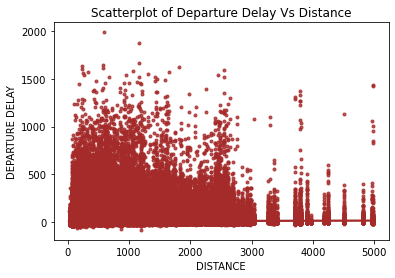

In [ ]:
# scatter plot with regression line

scatter, ax = plt.subplots()
ax = sns.regplot(x = 'DISTANCE', y = 'DEPARTURE_DELAY', data = df, color = "brown",marker = '.' )

ax.set_title('Scatterplot of Departure Delay Vs Distance')
ax.set_xlabel('DISTANCE')
ax.set_ylabel('DEPARTURE DELAY')

plt.show()

# scatter plot with regression line
scatter, ax = plt.subplots()
ax = sns.regplot(x = 'DISTANCE', y = 'ARRIVAL_DELAY', data = df, color = "orange", marker = '.')

ax.set_title('Scatterplot of Arrival Delay Vs Distance')
ax.set_xlabel('DISTANCE')
ax.set_ylabel('ARRIVAL DELAY')

plt.show()


In [65]:
# Exploring if there is a departure delay (i.e. positive values for departure delay), does distance have anything to do with arrival delay? Presuming longer distance flights can make up more time.
# Create dataframe with positive departure delays only
FD_dep_delay= df[df['DEPARTURE_DELAY']>0][['AIRLINE','DISTANCE','DEPARTURE_DELAY','ARRIVAL_DELAY']]

# check correlation
FD_dep_delay.corr()


,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY
DISTANCE,1.000000,-0.023941,-0.065957
DEPARTURE_DELAY,-0.023941,1.000000,0.965440
ARRIVAL_DELAY,-0.065957,0.965440,1.000000


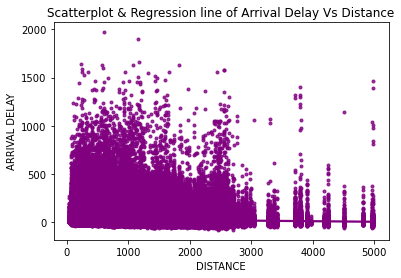

In [66]:
# scatter plot with regression line
scatter, ax = plt.subplots()
ax = sns.regplot(x = 'DISTANCE', y = 'ARRIVAL_DELAY', data = FD_dep_delay, color = "purple",marker = '.')

ax.set_title('Scatterplot & Regression line of Arrival Delay Vs Distance')
ax.set_xlabel('DISTANCE')
ax.set_ylabel('ARRIVAL DELAY')

plt.show()


In [72]:
#How does the overall flight volume vary by month in 2015
#plot the line chart
plt.plot(df['MONTH'].unique(), cncl["FLIGHT_NUMBER"], color="orange")
#add labels
plt.title(f"Number of flights per month in 2015")
plt.xlabel("Month")
plt.ylabel("Number of flights")
#add grid for reader to easier visulaize chart
plt.grid()
#setting limits for x and yl
plt.xlim(0,max(df['MONTH'].unique()))
plt.ylim(int(min(cncl["Number of flights"]))-2,int(max(cncl["Number of flights"]))+2)

NameError: name 'cncl' is not defined

In [ ]:

8.	Which airlines on average depart before the set schedule in 2015